**NLP**


In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import numpy
import seaborn as sns
train = pd.read_csv("/content/dreaddit-train.csv")
test = pd.read_csv("/content/dreaddit-test.csv")

In [ ]:

print(train.columns)
print(train.shape)

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)
(2838, 116)


In [ ]:
print(test.columns)
print(test.shape)

Index(['id', 'subreddit', 'post_id', 'sentence_range', 'text', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)
(715, 116)


In [ ]:
train.select_dtypes(include=['object']).columns.tolist()

['subreddit', 'post_id', 'sentence_range', 'text']

In [ ]:
test.select_dtypes(include=['object']).columns.tolist()

['subreddit', 'post_id', 'sentence_range', 'text']

In [ ]:
train.subreddit.value_counts()

ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64

In [ ]:
test.subreddit.value_counts()

anxiety             147
relationships       142
ptsd                127
domesticviolence     72
survivorsofabuse     70
assistance           66
homeless             52
almosthomeless       19
stress               14
food_pantry           6
Name: subreddit, dtype: int64

In [ ]:
train = train.drop(['post_id', 'sentence_range', 'id'], axis = 1)
test = test.drop(['post_id', 'sentence_range', 'id'], axis = 1)

In [ ]:
df = pd.concat([train,test],axis=0,ignore_index=True)
df = df.sample(frac = 1).reset_index(drop = True)
df.head()

,subreddit,text,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,domesticviolence,"Not like triggers per say, because I'd have to...",0,0.833333,1.534194e+09,3,6.665275,89,13.48,36.80,...,1.000,1.1429,1.0,1.70382,1.45679,1.89811,1.00,7,7.198110,0.096032
1,anxiety,"Every single day I think about what happened, ...",1,0.833333,1.529399e+09,2,3.164687,91,9.98,6.21,...,1.000,1.1818,1.0,1.75678,1.42469,1.80637,1.00,0,4.208750,-0.090179
2,assistance,We are down to less than $100 for another week...,0,0.000000,1.539912e+09,0,2.985224,65,14.38,89.07,...,1.000,1.0000,1.0,1.69925,1.53818,1.94114,0.32,6,4.606149,-0.074537
3,relationships,I have had two or three or more reoccurring dr...,1,1.000000,1.515862e+09,0,4.210403,119,6.23,20.05,...,1.000,1.1818,1.0,1.72734,1.56038,1.92001,0.38,18,5.205000,-0.017063
4,assistance,I've hit a roadblock and I need your help. I c...,0,1.000000,1.500453e+09,2,4.152609,86,24.34,87.75,...,1.125,1.1429,1.0,1.64808,1.39200,1.86801,0.55,2,4.925130,0.183333


In [ ]:
print(df.isnull().sum())

subreddit                   0
text                        0
label                       0
confidence                  0
social_timestamp            0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 113, dtype: int64


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["text"] = df["text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(-0.5, 399.5, 199.5, -0.5)

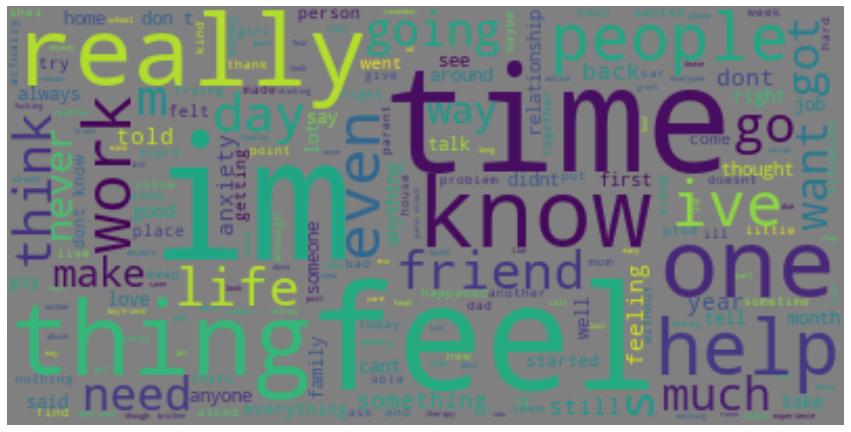

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="grey").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


In [ ]:
df["label"] = df["label"].map({0: "No Stress ", 1: "Stress"})
df = df[["text", "label"]]
print(df.head())

                                                text       label
0  like trigger per say id ask general behavior l...  No Stress 
1  every single day think happened scare day hand...      Stress
2  le  another week  day weight watcher due sad m...  No Stress 
3  two three reoccurring dream cheating boyfriend...      Stress
4  ive hit roadblock need help created gofundme c...  No Stress 


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'number of stressed and not stressed posts')

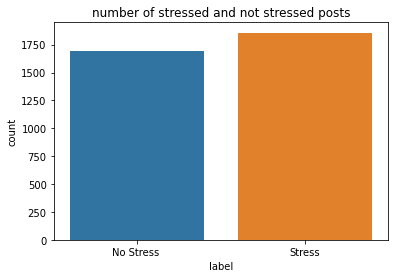

In [ ]:
sns.countplot(df.label)
plt.xlabel('label')
plt.title('number of stressed and not stressed posts')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(df["text"])
y = np.array(df["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.33,
                                                random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(xtrain, ytrain)

MultinomialNB()

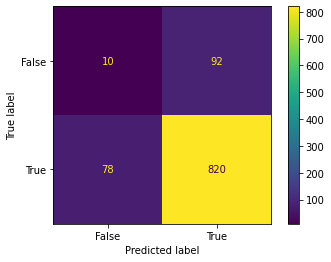

In [ ]:
actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: dont talk to me
['Stress']
